In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, fbeta_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [20]:
train = pd.read_csv('trainx.csv')
test = pd.read_csv('testx.csv')
val = pd.read_csv('val.csv')

In [24]:
train = pd.read_csv('X_train.csv')
test = pd.read_csv('X_test.csv')

In [25]:
channel_names = [f"channel_{x}" for x in range(41,46 + 1)]

# Calculate mean and std of nominal samples for each channel
train_nominal_data = train.loc[train["is_anomaly"] == 0, channel_names].values
means = np.mean(train_nominal_data, axis=0)
stds = np.std(train_nominal_data, axis=0)
means, stds

# Find test samples with values outside of (mean ± N * std) for any channel
N = 5
test_data = test.loc[:, channel_names]
detections = (test_data > (means + N * stds)) | (test_data < (means - N * stds))
aggregated_detections = detections.max(axis=1).astype(np.uint8)


KeyError: 'is_anomaly'

<Axes: title={'center': 'Results for N=5'}, xlabel='id'>

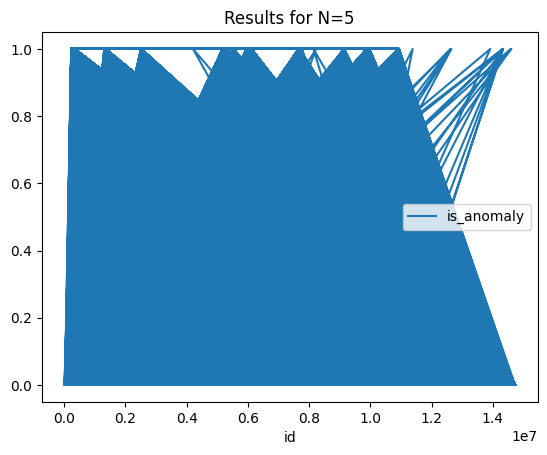

In [22]:
# Save to submission file
submission_df = pd.DataFrame(columns=["id", "is_anomaly"])
submission_df["id"] = test["id"]
submission_df["is_anomaly"] = aggregated_detections

submission_df.plot("id", "is_anomaly", title=f"Results for N={N}")

In [11]:
# Ground truth and predictions
y_true = test["is_anomaly"].values
y_pred = aggregated_detections.values  # or just aggregated_detections if it's a NumPy array

# Precision
precision = precision_score(y_true, y_pred)

# Recall
recall = recall_score(y_true, y_pred)

# F0.5 Score (favoring precision)
f05_score = fbeta_score(y_true, y_pred, beta=0.5)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F0.5 Score: {f05_score:.4f}")

Precision: 1.0000
Recall: 0.0957
F0.5 Score: 0.3461
